Linear Regression Using Numpy
http://math.bu.edu/people/cgineste/classes/ma575/p/w14_1.pdf

In [1]:
import pandas as pd
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

Importing data

In [2]:
data = pd.read_csv('../data/weight_height_data.csv',index_col='Index')
#data = data.sample(n=1000, random_state=1)
X = data["Height(Inches)"].values
y = data["Weight(Pounds)"].values

Defining the linear model

$$\hat{y} = \vec{\beta} \vec{X} + \alpha$$

Objective Function: 

$$\vec{\hat{\beta}}=\min_{\vec{\hat{\beta}}} L(D, \vec{\beta}) =\min_{\vec{\hat{\beta}}} \sum_{i=1}^{n}{(\hat{\beta} .\vec{x_i} - y_i)^2}$$
$$L(D,\vec{\beta})=||X\vec{\beta} - Y||^2$$
$$=(X\vec{\beta}-y)^T(X\vec{\beta}-Y)$$
$$=Y^TY-Y^TX\vec{\beta}-\vec{\beta}^TX^TY+\vec{\beta}^TX^TX\vec{\beta}$$

Get gradient w.r.t. $\vec{\beta}$

$$\frac{\partial{L(D,\vec{\beta})}}{\partial{\vec{\beta}}} = \frac{\partial{(Y^TY-Y^TX\vec{\beta}-\vec{\beta}^TX^TY+\vec{\beta}X^TX\vec{\beta}})}{\partial{\vec{\beta}}}$$
$$= -2Y^TX+2\vec{\beta}^TX^TX$$
$$=-2Y^TX+2\vec{\beta}+2\vec{\beta}^TX^TX$$

Set gradient to zero.

$$=-2Y^TX+2\vec{\beta}^TX^TX=0$$
$$Y^TX=\vec{\beta}^TX^TX$$
$$X^TY=X^TX\vec{\beta}$$
$$\vec{\beta}=(X^TX)^{-1}X^TY$$

Optimize the parameters $\vec{\beta}$ and $\alpha$ using ordinary least squares (OLS)

In this case, the first element of $\vec{\beta}$ is $\alpha$. We also concatenate a ones vector ($\vec{1}$) to the beginning of $\vec{X}$ to account for the intercept $\alpha$.



$$\hat{\beta} = (\vec{X}^{T} \vec{X})^{-1} \vec{X}^{T} \vec{y}$$

Root Mean Square Error

$$rmse(\hat{y},y)=\sqrt{\frac{1}{n}\sum_{i}^{n}{(\hat{y}-y)}^2}$$

In [3]:
def rmse(y_hat, y):
    return np.sqrt(np.mean((y_hat - y)**2))

In [11]:
def l1_lasso(betas, X, y, λ):
    X = np.array([np.ones(len(X)),X])
    return np.sum((y - (X.T @ betas))**2) +  λ * np.abs(betas).sum()

In [12]:
def lasso_regression(X,y,λ):
    betas = list(np.random.normal(0,.001,X.ndim+1))
    res = minimize(l1_lasso, x0=betas, args=(X, y, λ))
    print(res)
    return res.x

In [13]:
betas = lasso_regression(X,y,1)
yhat = np.array([np.ones(len(X)),X]).T @ betas

      fun: 2539798.9582052114
 hess_inv: array([[ 1.87294791e-06, -2.75242797e-08],
       [-2.75242797e-08,  4.72722267e-09]])
      jac: array([ 0.     , -0.03125])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 53
      nit: 6
     njev: 13
   status: 2
  success: False
        x: array([-82.54962313,   3.08309258])


In [14]:
rmse(yhat,y)

10.079113702086115

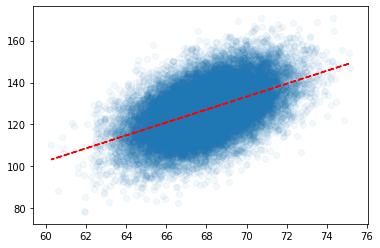

In [15]:
plt.plot(X,yhat, 'r--')
plt.scatter(X,y, alpha=0.05)